In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Data 

In [6]:
crabs = pd.read_csv('crab.csv')
crabs

,Unnamed: 0,Sex,Length,Age
0,0,F,1.4375,9
1,1,M,0.8875,6
2,2,I,1.0375,6
3,3,F,1.1750,10
4,4,I,0.8875,6
...,...,...,...,...
85,85,I,1.0500,11
86,86,F,1.4000,9
87,87,I,1.3000,11
88,88,M,1.5750,8


In [7]:
crab = crabs.iloc[:,1:]
crab

,Sex,Length,Age
0,F,1.4375,9
1,M,0.8875,6
2,I,1.0375,6
3,F,1.1750,10
4,I,0.8875,6
...,...,...,...
85,I,1.0500,11
86,F,1.4000,9
87,I,1.3000,11
88,M,1.5750,8


### Data Preprocessing : converting feature of sex to binary label

In [8]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
feature_sex = np.array(crab.Sex.unique())
print('feature sex : ',feature_sex)

feature_sex_biner = lb.fit_transform(feature_sex)
print('feature sex in biner : ',feature_sex_biner)

feature sex :  ['F' 'M' 'I']
feature sex in biner :  [0 2 1]


In [9]:
feature_sex_array = lb.fit_transform(np.array(crab['Sex']))
print('feature of sex in array:\n',feature_sex_array)
print('')
feature_length_array = np.array(crab['Length'])
print('feature of length in array:\n',feature_length_array)

feature of sex in array:
 [0 2 1 0 1 0 0 2 1 1 2 0 2 1 1 0 2 1 2 1 2 0 1 1 0 2 2 2 0 1 2 1 1 0 2 2 1
 0 1 1 1 1 0 2 1 0 2 0 0 2 2 2 1 0 1 0 0 1 1 0 1 1 1 1 0 2 2 1 2 2 2 0 2 2
 2 1 1 0 1 2 0 0 2 2 2 1 0 1 2 2]

feature of length in array:
 [1.4375 0.8875 1.0375 1.175  0.8875 1.55   1.3    1.325  1.5875 0.9125
 0.825  1.3625 0.8625 1.375  1.225  1.6375 1.6    1.0625 1.475  0.7625
 1.1125 1.625  0.925  0.575  1.2625 1.2625 1.3375 1.525  1.575  1.0875
 1.0625 1.25   1.2625 1.4875 1.55   1.4    1.1125 1.0125 0.75   1.05
 1.4375 0.8    1.7    1.5125 1.0375 1.725  1.25   1.725  1.375  1.525
 1.1375 1.8    1.375  1.3125 1.175  1.775  1.4375 0.6875 1.325  1.2625
 1.0625 1.075  0.825  1.6375 1.6125 1.3125 1.6875 1.275  1.4625 0.925
 0.7    1.325  0.875  1.525  1.125  1.4625 1.35   1.35   1.325  1.9375
 1.3125 1.55   1.575  1.25   1.85   1.05   1.4    1.3    1.575  1.5   ]


### Combining These Two Features as Numpy Array

In [10]:
features = np.stack((feature_sex_array,feature_length_array),axis=1)
print('features :\n',features)
print('')
target = np.array(crab['Age'])
print('target :\n',target)

features :
 [[0.     1.4375]
 [2.     0.8875]
 [1.     1.0375]
 [0.     1.175 ]
 [1.     0.8875]
 [0.     1.55  ]
 [0.     1.3   ]
 [2.     1.325 ]
 [1.     1.5875]
 [1.     0.9125]
 [2.     0.825 ]
 [0.     1.3625]
 [2.     0.8625]
 [1.     1.375 ]
 [1.     1.225 ]
 [0.     1.6375]
 [2.     1.6   ]
 [1.     1.0625]
 [2.     1.475 ]
 [1.     0.7625]
 [2.     1.1125]
 [0.     1.625 ]
 [1.     0.925 ]
 [1.     0.575 ]
 [0.     1.2625]
 [2.     1.2625]
 [2.     1.3375]
 [2.     1.525 ]
 [0.     1.575 ]
 [1.     1.0875]
 [2.     1.0625]
 [1.     1.25  ]
 [1.     1.2625]
 [0.     1.4875]
 [2.     1.55  ]
 [2.     1.4   ]
 [1.     1.1125]
 [0.     1.0125]
 [1.     0.75  ]
 [1.     1.05  ]
 [1.     1.4375]
 [1.     0.8   ]
 [0.     1.7   ]
 [2.     1.5125]
 [1.     1.0375]
 [0.     1.725 ]
 [2.     1.25  ]
 [0.     1.725 ]
 [0.     1.375 ]
 [2.     1.525 ]
 [2.     1.1375]
 [2.     1.8   ]
 [1.     1.375 ]
 [0.     1.3125]
 [1.     1.175 ]
 [0.     1.775 ]
 [0.     1.4375]
 [1.     0.6875]
 [

### Data Visualization in 3D

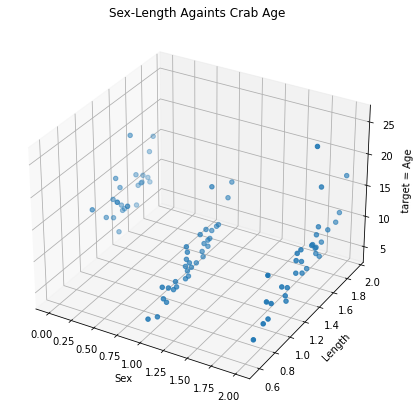

In [11]:
plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')

x = np.array(feature_sex_array)
y = np.array(feature_length_array)
z = np.array(target)
ax.set(title='Sex-Length Againts Crab Age',xlabel='Sex',ylabel='Length',zlabel='target = Age')

ax.scatter(x,y,z)
plt.show()

### Spliting Train and Test Data from Scratch, without Scikit-learn

In [12]:
from sklearn.model_selection import train_test_split

features_train,features_test,y_train_list,y_test_list = train_test_split(features,target,test_size=0.25,random_state=20)

In [13]:
print('features of train :\n',features_train)
print('train target :\n',y_train_list)

features of train :
 [[2.     0.8875]
 [2.     1.25  ]
 [2.     1.6875]
 [1.     0.7625]
 [1.     1.1125]
 [1.     1.05  ]
 [0.     1.775 ]
 [1.     1.175 ]
 [1.     0.75  ]
 [1.     1.5875]
 [1.     1.375 ]
 [2.     1.525 ]
 [1.     0.8875]
 [2.     0.875 ]
 [2.     1.85  ]
 [2.     1.525 ]
 [2.     1.25  ]
 [1.     1.6375]
 [2.     1.0625]
 [0.     1.7   ]
 [0.     1.375 ]
 [0.     1.4875]
 [2.     1.8   ]
 [0.     1.2625]
 [0.     1.2625]
 [1.     1.225 ]
 [2.     1.3125]
 [0.     1.725 ]
 [1.     1.0875]
 [0.     1.3625]
 [1.     1.35  ]
 [2.     1.125 ]
 [2.     1.5   ]
 [0.     1.6125]
 [0.     1.35  ]
 [2.     1.5125]
 [0.     1.4375]
 [1.     1.0625]
 [2.     1.525 ]
 [2.     0.925 ]
 [2.     0.7   ]
 [2.     1.475 ]
 [1.     1.05  ]
 [2.     0.825 ]
 [1.     1.2625]
 [1.     0.6875]
 [1.     1.075 ]
 [0.     1.175 ]
 [2.     1.2625]
 [1.     1.325 ]
 [1.     1.375 ]
 [0.     1.3125]
 [0.     1.3   ]
 [2.     1.325 ]
 [2.     1.9375]
 [1.     0.825 ]
 [2.     1.6   ]
 [2.     1

### Using K-Nearest Neighbors Regression Model

In [14]:
from sklearn.neighbors import KNeighborsRegressor
KReg = KNeighborsRegressor(n_neighbors = 6)

In [15]:
KReg.fit(features_train,y_train_list)

KNeighborsRegressor(n_neighbors=6)

In [16]:
target_pd = pd.DataFrame({'Sex':feature_sex,'Sex biner':feature_sex_biner})
target_pd

,Sex,Sex biner
0,F,0
1,M,2
2,I,1


### Making Predictions

In [17]:
def sex_biner(i):
    return(float(target_pd['Sex biner'].loc[target_pd['Sex']==i]))

tanya = str(input('Sex of your crab : '))
length = float(input('Length of your crab : '))

out1 = float(sex_biner(tanya))

prediction = float(KReg.predict([[out1,length]]))
print('age of your crab is about',round(prediction,2),'years old')

Sex of your crab : F
Length of your crab : 1
age of your crab is about 10.5 years old


In [18]:
test_predict = KReg.predict(features_test)
print('prediction of testing data :\n',test_predict)

prediction of testing data :
 [11.          8.          7.83333333  9.66666667 10.33333333  9.
  8.          6.33333333 10.66666667 12.33333333 10.33333333 13.
 12.33333333 11.16666667  9.83333333  6.33333333 12.83333333 12.83333333
 10.5         9.83333333  8.         10.66666667 13.33333333]


In [19]:
train_predict = KReg.predict(features_train)
print('prediction of training data :\n',train_predict)

prediction of training data :
 [ 7.83333333 10.33333333 11.          6.33333333  7.33333333  8.
 12.83333333  7.66666667  6.33333333 12.5        10.66666667 13.33333333
  6.66666667  7.83333333 12.33333333 13.33333333 10.33333333 12.5
  7.83333333 12.83333333  9.66666667 11.66666667 12.33333333 10.5
 10.5         8.16666667 10.33333333 12.83333333  8.         10.66666667
 10.16666667  9.         13.         13.33333333 10.66666667 13.
 11.16666667  8.         13.33333333  8.16666667  7.83333333 13.
  8.          7.83333333  9.83333333  6.33333333  8.         10.5
 10.33333333 10.33333333 10.66666667 11.         11.         10.33333333
 12.33333333  6.66666667 10.83333333 10.33333333 10.66666667 10.66666667
 10.66666667  7.66666667 11.5         9.          7.66666667 12.33333333
 12.83333333]


### Evaluating the Model

In [20]:
r2_score = KReg.score(features_test,y_test_list)
print('Value of R-Squared :\n',round(r2_score,3))

Value of R-Squared :
 0.123


### Choose the Best Value of K and the Number of Random-State

In [21]:
from sklearn.model_selection import train_test_split
random_state_n = 0
limit_n = 12
range_n = np.arange(1,limit_n+1)
n_list = []
r2_score_test = []
r2_score_train = []
while random_state_n <= 100000:
    features_train,features_test,y_train_list,y_test_list = train_test_split(features,target,test_size=0.25,random_state=random_state_n)
    
    for n in range_n:
        KReg = KNeighborsRegressor(n_neighbors = n)
        n_list.append(n)
        KReg.fit(features_train,y_train_list)
        r2_score_test_output = round(KReg.score(features_test,y_test_list),4)
        r2_score_train_output = round(KReg.score(features_train,y_train_list),4)
        if r2_score_test_output > 0.6:
            if r2_score_train_output > 0.6:
                print('for value of neighbors is',n,'and random state for train-test-split is',random_state_n,':')
                print('train score : ',r2_score_train_output)
                print('test score : ',r2_score_test_output)
                print('')
        r2_score_test.append(r2_score_test_output)
        r2_score_train.append(r2_score_train_output)
        n += 1
    random_state_n+=1

for value of neighbors is 2 and random state for train-test-split is 4839 :
train score :  0.6466
test score :  0.6107

for value of neighbors is 1 and random state for train-test-split is 6238 :
train score :  0.7143
test score :  0.603

for value of neighbors is 2 and random state for train-test-split is 26431 :
train score :  0.6078
test score :  0.6045

for value of neighbors is 1 and random state for train-test-split is 29202 :
train score :  0.7085
test score :  0.6516

for value of neighbors is 1 and random state for train-test-split is 31949 :
train score :  0.7465
test score :  0.602

for value of neighbors is 1 and random state for train-test-split is 44399 :
train score :  0.7496
test score :  0.6045

for value of neighbors is 2 and random state for train-test-split is 60678 :
train score :  0.6594
test score :  0.641

for value of neighbors is 1 and random state for train-test-split is 63203 :
train score :  0.7328
test score :  0.6168

for value of neighbors is 2 and rando

### Since the Best Combination of Train Score & Test Score is in K = 1 and Random State = 83612, Then Remake the K-Nearest Neighbors and Train-Test-Split Model !!

In [22]:
features_train,features_test,y_train_list,y_test_list = train_test_split(features,target,test_size=0.25,random_state=83612)

In [23]:
KReg2 = KNeighborsRegressor(n_neighbors=1)
KReg2

KNeighborsRegressor(n_neighbors=1)

In [24]:
KReg2.fit(features_train,y_train_list)

KNeighborsRegressor(n_neighbors=1)

### Making Predictions Based on Newest Model

In [25]:
def sex_biner(i):
    return(float(target_pd['Sex biner'].loc[target_pd['Sex']==i]))

tanya = str(input('Sex of your crab : '))
length = float(input('Length of your crab : '))

out1 = float(sex_biner(tanya))

prediction = float(KReg2.predict([[out1,length]]))
print('age of your crab is about',round(prediction,2),'years old')

Sex of your crab : F
Length of your crab : 1
age of your crab is about 10.0 years old


### Evaluating the Newest Model

In [26]:
y_pred_2 = KReg2.predict(features_test)
y_pred_2

array([ 7.,  8.,  6.,  7., 10.,  6.,  9., 11.,  7.,  7., 10., 10., 15.,
        9.,  8., 13., 10.,  6.,  8.,  8.,  9.,  6., 15.])

In [27]:
KReg2_test_score = KReg2.score(features_test,y_test_list)
print('test score of newest model : ',round(KReg2_test_score,4))

test score of newest model :  0.7092


In [28]:
KReg2_train_score = KReg2.score(features_train,y_train_list)
print('train score of newest model : ',round(KReg2_train_score,4))

train score of newest model :  0.7233
